NNDL Assignment - 2

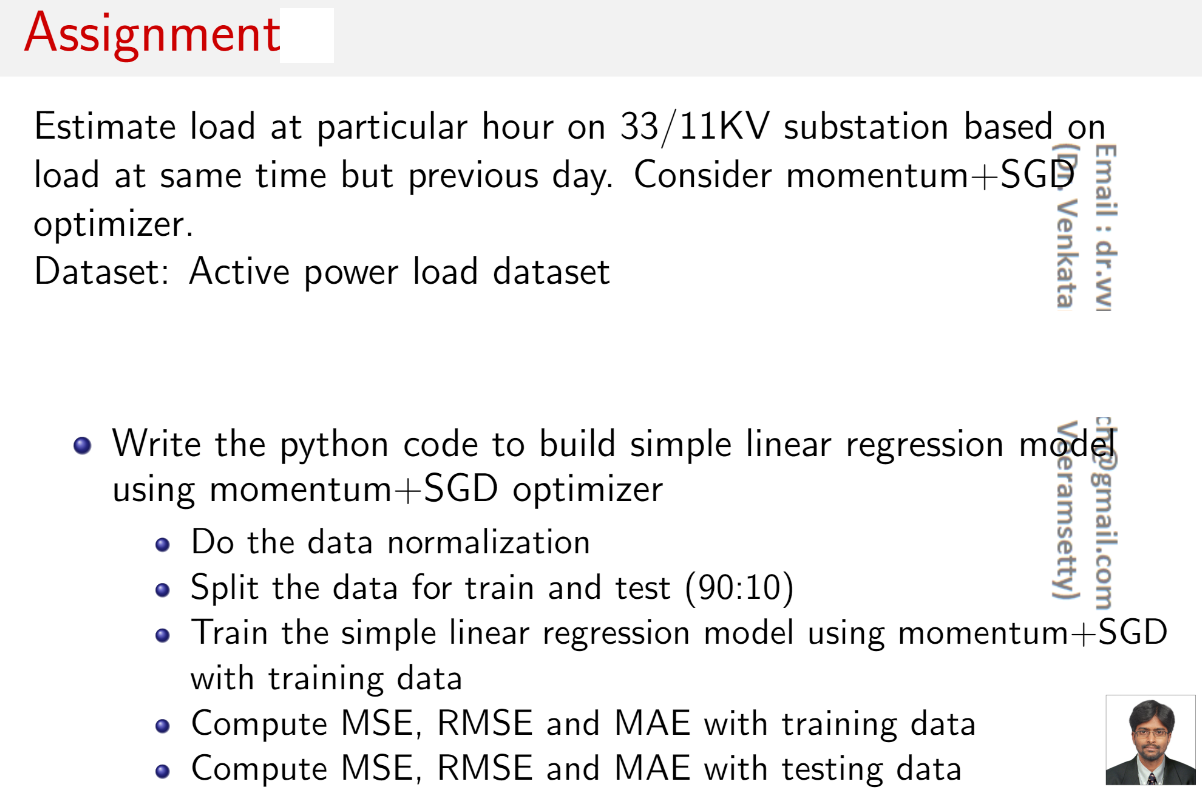

In [1]:
from PIL import Image
img = Image.open('Assignment-2 Q.png')
img

Importing Packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Reading the Data

In [4]:
data = pd.read_excel('assignment2.xlsx')
data.head()

,Date,Time,Load (kW)
0,01.09.2018,00:00:00,5551.82208
1,NaN,01:00:00,4983.17184
2,NaN,02:00:00,4888.39680
3,NaN,03:00:00,5072.95872
4,NaN,04:00:00,5196.25980


Reshaping the Data (X-Previous day's same hour data, Y-Present day's same hour data) 

In [9]:
X = []
Y = []
for i in range(24, data.shape[0]):
    X.append(data['Load (kW)'].iloc[i-24])
    Y.append(data['Load (kW)'].iloc[i])

Appending the data (Renaming Them)

In [15]:
data = pd.DataFrame({'Prev Day Load' : X, 'Pres Day Load' : Y})
data.head()

,Prev Day Load,Pres Day Load
0,5551.82208,4931.26380
1,4983.17184,4775.53968
2,4888.39680,4713.81120
3,5072.95872,4689.02628
4,5196.25980,4844.75040


Data Normalization

In [19]:
Xmax = np.max(data['Prev Day Load'])
Xmin = np.min(data['Prev Day Load'])
Ymax = np.max(data['Pres Day Load'])
Ymin = np.min(data['Pres Day Load'])
data['Prev Day Load'] = (data['Prev Day Load'] - Xmin) / (Xmax - Xmin)
data['Pres Day Load'] = (data['Pres Day Load'] - Ymin) / (Ymax - Ymin)
data.head()

,Prev Day Load,Pres Day Load
0,0.397877,0.284300
1,0.293800,0.255799
2,0.276454,0.244501
3,0.310234,0.239965
4,0.332801,0.268466


Splitting the Data

In [20]:
x = data['Prev Day Load']
y = data['Pres Day Load']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.1, random_state=101)

Training the Model

In [37]:
m = np.random.uniform(-5, 5)
c = np.random.uniform(-5, 5)
eta = 0.01
epochs = 500
vm = 0
vc = 0
v = 0.5

# Loop for epochs
for _ in range(epochs):
    
    for i in range(Xtrain.shape[0]):
        # Calculating Grad M
        gradM = -1 * (Ytrain.iloc[i] - m * Xtrain.iloc[i] - c) * Xtrain.iloc[i]
    
        # Calculating Grad C
        gradC = -1 * (Ytrain.iloc[i] - m * Xtrain.iloc[i] - c)
        
        # Calculating updated values of vm and vc
        vm = (v * vm) - (eta * gradM)
        vc = (v * vc) - (eta * gradC)
        
        # Updating m and c values
        m += vm
        c += vc

# Print model parameters after training
print(f'm = {m}\nc = {c}')

m = 0.7171132537325571
c = 0.12511078784145233


Prediction Calculation

In [38]:
train_pred = [m * Xtrain.iloc[i] + c for i in range(Xtrain.shape[0])]
test_pred = [m * Xtest.iloc[i] + c for i in range(Xtest.shape[0])]

Denormalization of Data

In [39]:
train_pred = [i * (Ymax - Ymin) + Ymin for i in train_pred]
test_pred = [i * (Ymax - Ymin) + Ymin for i in test_pred]
trainY = [i * (Ymax - Ymin) + Ymin for i in Ytrain]
testY = [i * (Ymax - Ymin) + Ymin for i in Ytest]

Training and Testing Error

In [40]:
# Training Error Calculation
training_MAE = sum([abs(train_pred[i] - trainY[i]) for i in range(len(trainY))]) / len(trainY)
training_MSE = sum([(train_pred[i] - trainY[i]) ** 2 for i in range(len(trainY))]) / len(trainY)
training_RMSE = training_MSE ** 0.5
print('Training Error :')
print(f'MAE : {training_MAE}')
print(f'MSE : {training_MSE}')
print(f'RMSE : {training_RMSE}')

# Testing Error Calculation
testing_MAE = sum([abs(test_pred[i] - testY[i]) for i in range(len(testY))]) / len(testY)
testing_MSE = sum([(test_pred[i] - testY[i]) ** 2 for i in range(len(testY))]) / len(testY)
testing_RMSE = testing_MSE ** 0.5
print('Testing Error :')
print(f'MAE : {testing_MAE}')
print(f'MSE : {testing_MSE}')
print(f'RMSE : {testing_RMSE}')

Training Error :
MAE : 533.2583331279446
MSE : 519633.2481810661
RMSE : 720.8559136062256
Testing Error :
MAE : 546.2799015481903
MSE : 497098.195375769
RMSE : 705.0519097029445


Actual vs Predicted Training Values

In [41]:
pd.DataFrame({'Actual Values' : trainY, 'Predicted Values' : train_pred})

,Actual Values,Predicted Values
0,4221.85392,4606.326987
1,7609.43808,6503.071349
2,5847.05880,5918.219480
3,4672.50300,4994.327911
4,7883.78688,6613.066425
...,...,...
1939,5830.37964,5678.778979
1940,6110.49600,5870.823228
1941,5289.94368,5445.151226
1942,7962.97392,7536.399077


Actual vs Predicted Testing Values

In [42]:
pd.DataFrame({'Actual Values' : testY, 'Predicted Values' : test_pred})

,Actual Values,Predicted Values
0,6161.624640,5671.401261
1,5761.792440,6900.126746
2,7390.270800,6397.771184
3,4597.368840,5845.783699
4,5242.712040,5959.132283
...,...,...
211,6764.319072,7487.549637
212,7390.270800,6726.415010
213,6550.077600,6545.325555
214,5722.043040,5567.554283


Real Time Prediction

In [43]:
x = float(input('Enter the load at present hour on previouus day : '))
x = (x - Xmin) / (Xmax - Xmin)
prediction = m * x + c
prediction = (prediction * (Ymax - Ymin)) + Ymin
print('Predicted load at present hour :', prediction)

Predicted load at present hour : 6004.211112322538
